# Content
## Supervised Learning
### Classification and Regression Overview
- Definition and Explaination
- Generalization, overfitting and underfitting
### Algorithms
- Classification
    - Example
    - Real World Problem
- Regression
    - Example
    - Real World Problem
### K-Neighbors Algorithm
- K-Neighbors Classification
    - Applying K-Neighbors Classifier on Example
    - Analyzing K-NeighborsClassifier
- K-Neighbors Regression
    - Applying K-Neighbors Regression on Example
    - Analyzing K-NeighborsRegressor
    
Disadvantage: prediction being slow and its inability to handle many features

### Linear Models
- Linear Models for Regression
    - Ordinary Least Square (OLS)
        - Disadvantage: can't control Complexity
    - Ridge Regression
    - Lasso
- Linear Models for Classification
    - LogisticRegression
    - SVC
    - Linear Models for two calss Classification
    - Linear Models for Multi-calss Classification
### Naive Bayes Classifier

- scikit-learn
    - GaussianNB can be applied to any continuous data
    - BernoulliNB assumes binary data
    - MultinomialNB assumes count data
### Decision Trees
Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision

# Supervised Learning
supervised learning is used whenever we want to predict a certain
outcome from a given input, and we have examples of input/output pairs. We build a machine learning model from these input/output pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data. Supervised learning often requires human effort to build the training set, but afterward automates and often speeds up an otherwise laborious or infeasible task.

## Classification and Regression
### Classification
In classification, the goal is to predict a class label, which is a choice from a predefined list of possibilities

example: Binary classification

In binary classification we often speak of one class being the posi‐
tive class and the other class being the negative class. Here, positive
doesn’t represent having benefit or value, but rather what the object
of the study is. So, when looking for spam, “positive” could mean
the spam class. Which of the two classes is called positive is often a
subjective matter, and specific to the domain.

### Regression
For regression tasks, the goal is to predict a continuous number, or a floating-point number in programming terms (or real number in mathematical terms).

### Generalization,Overfitting and Underfitting
Overfitting
occurs when you fit a model too closely to the particularities of the training set and
obtain a model that works well on the training set but is not able to generalize to new
data. On the other hand, if your model is too simple—say, “Everybody who owns a
house buys a boat”—then you might not be able to capture all the aspects of and vari‐
ability in the data, and your model will do badly even on the training set. Choosing
too simple a model is called underfitting.

## Supervised Machine Learning Algorithms
We will use several datasets to illustrate the different algorithms. Some of the datasets will be small and synthetic (meaning made-up), designed to highlight particular aspects of the algorithms. Other datasets will be large, real-world examples

In [2]:
# Importing Used Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sklearn

## Classification Example
An example of a synthetic two-class classification dataset is the forge dataset

X.shape: (26, 2)


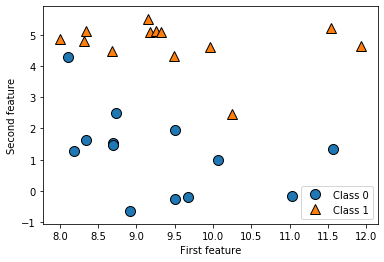

In [3]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

## Real-World problem

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
# Meet the Data
print("Shape of cancer data: {}".format(cancer.data.shape))
# The dataset consists of 569 data points, with 30 features each

print("Sample counts per class:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
# Of these 569 data points, 212 are labeled as malignant and 357 as benign

Shape of cancer data: (569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}


In [6]:
#Make an iterator that aggregates elements from each of the iterables. Returns an iterator of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables.
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## Regression Example
To illustrate regression algorithms, we will use the synthetic wave dataset. The wave
dataset has a single input feature and a continuous target variable (or response) that
we want to model. 

Text(0, 0.5, 'Target')

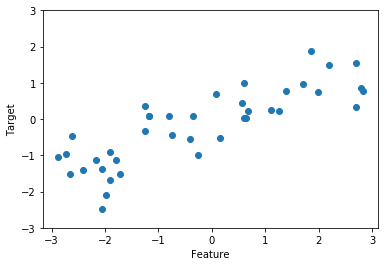

In [7]:
# Plot of the wave dataset, with the x-axis showing the feature and the y-axis showing the regression target
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

## Real-world Problem
We will also be using a real-world regression dataset, the Boston Housing dataset.The task associated with this dataset is to predict the median value of homes in several Boston neighborhoods in the 1970s ,using information such as crime rate, proximity to the Charles River, highway accessibility, and so on. The dataset contains 506
data points, described by 13 features

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


For our purposes here, we will actually expand this dataset by not only considering these 13 measurements as input features, but also looking at all products (also called interactions) between features. In other words, we will not only consider crime rate and highway accessibility as features, but also the product of crime rate and highway accessibility. Including derived feature like these is called feature engineering

In [9]:
# Derived Dataset
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


The resulting 104 features are the 13 original features together with the 91 possible combinations of two features within those 13

## Using K-Nearest Neighbors Algorithm
The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its
“nearest neighbors.”

### K-Neighbors classification
In its simplest version, the k-NN algorithm only considers exactly one nearest neighbor, which is the closest training data point to the point we want to make a prediction for.

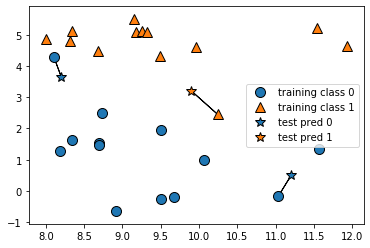

In [10]:
# Using one nearest neighbor
mglearn.plots.plot_knn_classification(n_neighbors=1)

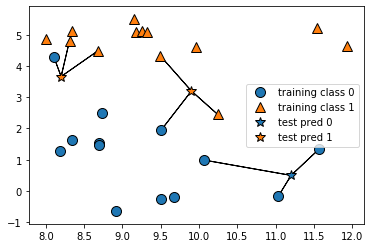

In [11]:
# Using three nearest neighbor
mglearn.plots.plot_knn_classification(n_neighbors=3)

## Applying K-Neighbors Classification on Example (Forge)

In [12]:
# Load and split the Data
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Choose Algorithm
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
# Fit the model
clf.fit(X_train, y_train)
# Prediction
print("Test set predictions: {}".format(clf.predict(X_test)))
# check Accuracy
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


## Analyzing KNeighborsClassifier

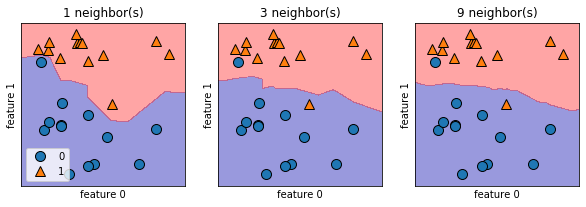

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

As you can see on the left in the figure, using a single neighbor results in a decision boundary that follows the training data closely. Considering more and more neighbors leads to a smoother decision boundary. A smoother boundary corresponds to a simpler model. In other words, using few neighbors corresponds to high model complexity

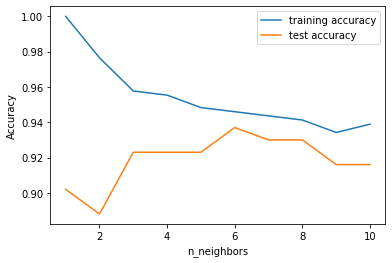

In [14]:
# connection between model complexity and generalization 
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### k-neighbors regression

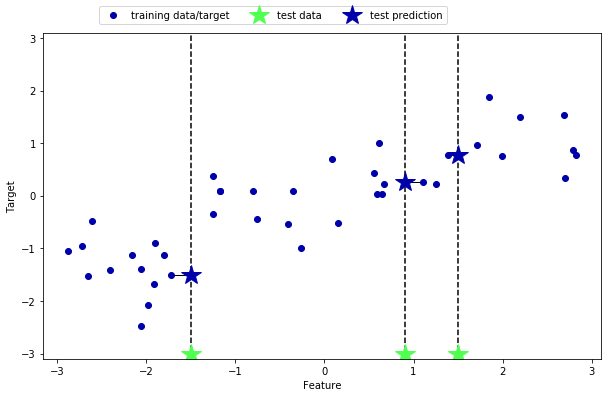

In [15]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

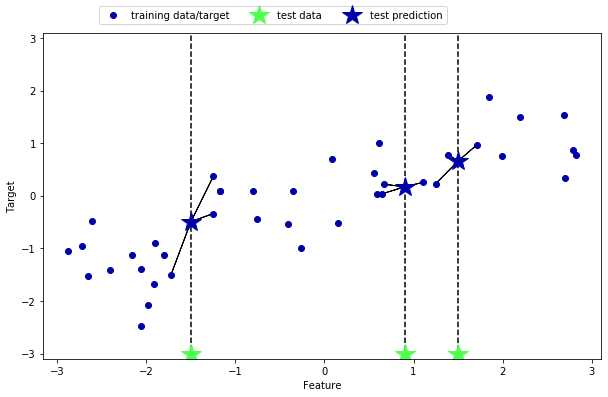

In [16]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

## Applying K-Neighbors Regression on Example (wave)

In [17]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

print("Test set predictions:\n{}".format(reg.predict(X_test)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


The R2 score, also known as the coefficient of determination, is a meas‐
ure of goodness of a prediction for a regression model, and yields a score between 0 and 1. A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds to a constant model that just predicts the mean of the training set responses, y_train

## Analyzing KNeighborsRegressor

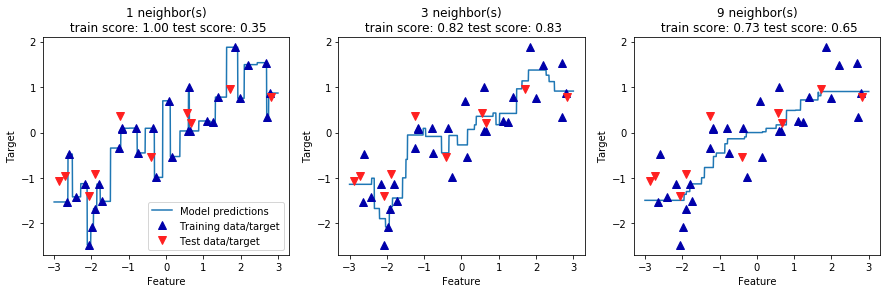

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
"{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
    n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
axes[0].legend(["Model predictions", "Training data/target",
"Test data/target"], loc="best")

As we can see from the plot, using only a single neighbor, each point in the training
set has an obvious influence on the predictions, and the predicted values go through
all of the data points. This leads to a very unsteady prediction. Considering more
neighbors leads to smoother predictions, but these do not fit the training data as well.

In principle, there are two important parameters to the KNeighbors classifier:
the number of neighbors and how you measure distance between data points. In practice, using a small number of neighbors like three or five often works well, but you should certainly adjust this parameter. Choosing the right distance measure is somewhat beyond the scope of this book. By default, Euclidean distance is used, which works well in many settings.

So, while the nearest k-neighbors algorithm is easy to understand, it is not often used in practice, due to prediction being slow and its inability to handle many features.

## Linear Models
Linear models make a prediction using a linear function of the input features
### Linear Models for Regression

ŷ = w[0\] * x[0\] + w[1\] * x[1\] + ... + w[p\] * x[p\] + b

where:

- x[0\] to x[p\] : features 
- p : Number of features
- w and b : parameters of the model that are learned 
- ŷ : The prediction

###  One Dimensional Dataset

Linear models for regression can be characterized as regression models for which the prediction is a line for a single feature, a plane when using two features, or a hyperplane in higher dimensions (that is, when using more features).

w[0]: 0.393906  b: -0.031804


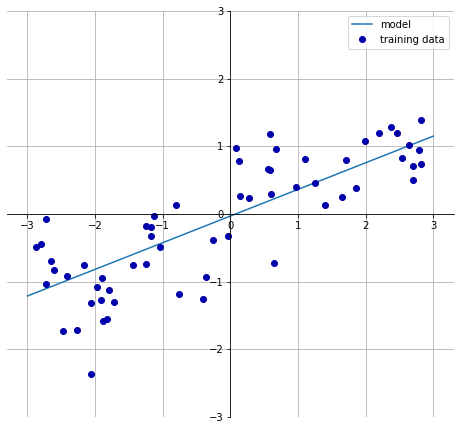

In [19]:
mglearn.plots.plot_linear_regression_wave()

There are many different linear models for regression. The difference between these models lies in how the model parameters w and b are learned from the training data, and how model complexity can be controlled.

If you compare the predictions made by the straight line with those made by the KNeighborsRegressor, using a straight line to make predictions seems very restrictive. It looks like all the fine details of the data are lost. In a sense, this is true. It is a strong (and somewhat unrealistic) assumption that our target y is a linear combination of the features. But looking at one-dimensional data gives a somewhat
skewed perspective. For datasets with many features, linear models can be very powerful. In particular, if you have more features than training data points, any target y can be perfectly modeled (on the training set) as a linear function

### Linear Regression (Ordinary Least squares)
the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y,
on the training set. The mean squared error is the sum of the squared differences between the predictions and the true values. Linear regression has no parameters,which is a benefit, but it also has no way to control model complexity

In [20]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

# The “slope” parameters (w), also called weights or coefficients, are stored in the coef_attribute, while the offset or intercept (b) is stored in the intercept_ attribute
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))


lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


scikit-learn always stores anything that is derived from the training data in attributes that end with a trailing underscore. That is to separate them from parameters that are set by the user.

In [21]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


This means we are likely underfitting, not over‐
fitting. For this one-dimensional dataset, there is little danger of overfitting, as the model is very simple (or restricted). However, with higher-dimensional datasets (meaning datasets with a large number of features), linear models become more powerful, and there is a higher chance of overfitting

## Applying linearRegression on a Real-world Problem( Boston Housing )

In [22]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


This discrepancy between performance on the training set and the test set is a clear sign of overfitting.

SO we need to try a model that allow controlling the complexity

## Ridge Regression
Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary least squares. In ridge regression,though, the coefficients (w) are chosen not only so that they predict well on the training data, but also to fit an additional constraint. We also want the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to zero. Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. This constraint is an example of what is called [regularization]. Regularization means explicitly restricting a model to avoid overfitting.

The particular kind used by ridge regression is known as L2 regularization. Ridge penalizes the L2 norm of the coefficients, or the Euclidean length of w

In [23]:
from sklearn.linear_model import Ridge
# Using default values = 1.0
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


SO

A less complex model means worse performance on the training
set, but better generalization. As we are only interested in generalization performance, we should choose the Ridge model over the LinearRegression model.

The Ridge model makes a trade-off between the simplicity of the model (near-zero coefficients) and its performance on the training set. How much importance the model places on simplicity versus training set performance can be specified by the user, using the [alpha parameter]

Increasing alpha forces coefficients to move more toward zero, which decreases training set performance but might help generalization. For example

In [24]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [25]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


Here, alpha=0.1 seems to be working well. We could try decreasing alpha even more to improve generalization

We can also get a more qualitative insight into how the alpha parameter changes the model by inspecting the coef_ attribute of models with different values of alpha. A higher alpha means a more restricted model, so we expect the entries of coef_ to have smaller magnitude for a high value of alpha than for a low value of alpha.

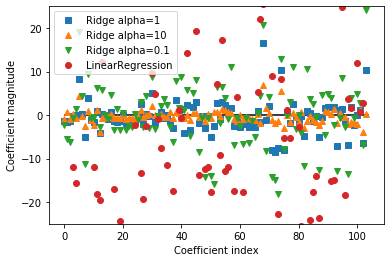

In [26]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

Here, the x-axis enumerates the entries of coef_: x=0 shows the coefficient associated with the first feature, x=1 the coefficient associated with the second feature, and so on up to x=100. 

The y-axis shows the numeric values of the corresponding values of the coefficients. 

The main takeaway here is that for alpha=10, the coefficients are mostly between around –3 and 3. The coefficients for the Ridge model with alpha=1 are somewhat larger. The dots corresponding to alpha=0.1 have larger magnitude still, and many of the dots corresponding to linear regression without any regularization (which would be alpha=0) are so large they are outside of the chart

### Regularization
Another way to understand the influence of regularization is to fix a value of alpha but vary the amount of training data available.we subsampled the Boston Housing dataset and evaluated LinearRegression and Ridge(alpha=1) on subsets of increasing size (plots that show model performance as a function of dataset size are called [learning curves])

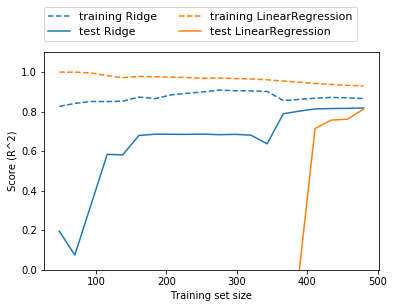

In [27]:
mglearn.plots.plot_ridge_n_samples()

As one would expect, the training score is higher than the test score for all dataset sizes, for both ridge and linear regression. 

Because ridge is regularized, the training score of ridge is lower than the training score for linear regression across the board.

However, the test score for ridge is better, particularly for small subsets of the data. For less than 400 data points, linear regression is not able to learn anything. As more and more data becomes available to the model, both models improve, and linear regression catches up with ridge in the end. 

The lesson here is that with enough training data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance

Another interesting aspect is the decrease in training performance for linear regression. If more data is added, it becomes harder for a model to overfit, or memorize the data.

## Lasso
restricts coefficients to be close to zero, but in a slightly different way, called L1 regularization The consequence of L1 regularization [The lasso penalizes the L1 norm of the coefficient vector—or in other words, the sum of the absolute values of
the coefficients.] is that when using the lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model. This can be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes a model easier to
interpret, and can reveal the most important features of your model.

In [28]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


As you can see, Lasso does quite badly, both on the training and the test set. This indicates that we are underfitting, and we find that it used only 4 of the 105 features. Similarly to Ridge, the Lasso also has a regularization parameter, alpha, that controls how strongly coefficients are pushed toward zero. In the previous example, we used the default of alpha=1.0. To reduce underfitting, let’s try decreasing alpha. When we do this, we also need to increase the default setting of max_iter

In [29]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


A lower alpha allowed us to fit a more complex model, which worked better on the training and test data. The performance is slightly better than using Ridge, and we are using only 33 of the 105 features. This makes this model potentially easier to understand.

If we set alpha too low, however, we again remove the effect of regularization and end
up overfitting, with a result similar to LinearRegression


In [30]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

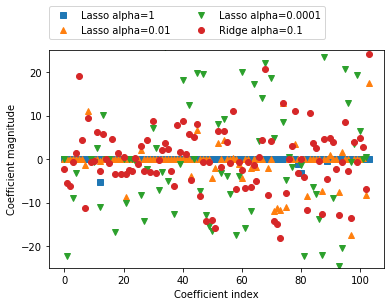

In [31]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")


In practice, ridge regression is usually the first choice between these two models.However, if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice. Similarly, if you would like to have a model that is easy to interpret, Lasso will provide a model that is easier to understand, as it will select only a subset of the input features. scikit-learn also provides the ElasticNet class, which combines the penalties of Lasso and Ridge. In practice,this combination works best, though at the price of having two parameters to adjust: one for the L1 regularization, and one for the L2 regularization.

## Linear models for classification

ŷ = w[0\] * x[0\] + w[1\] * x[1\] + ... + w[p\] * x[p\] + b > 0

Here we threshold the predicted value at zero. If the function is smaller than zero, we predict the class –1; if it is larger than zero, we predict the class +1. This prediction rule is common to all linear models for classification

If the function is smaller than zero, we predict the class –1; if it is larger than zero, we predict the class +1. This prediction rule is common to all linear models for classification. 

For linear models for classification,
the decision boundary is a linear function of the input. In other words, a (binary) linear classifier is a classifier that separates two classes using a line, a plane, or a hyperplane.

There are many algorithms for learning linear models. These algorithms all differ in
the following two ways:
- The way in which they measure how well a particular combination of coefficients
and intercept fits the training data
- If and what kind of regularization they use

Different algorithms choose different ways to measure what “fitting the training set well” means. 
For technical mathematical reasons, it is not possible to adjust w and b
to minimize the number of misclassifications the algorithms produce, as one might hope. For our purposes, and many applications, the different choices for item 1 in the preceding list (called [loss functions]) are of little significance.
The two most common linear classification algorithms are:
- logistic regression, implemented in linear_model.LogisticRegression, 
- linear support vector machines(linear SVMs), implemented in svm.LinearSVC (SVC stands for support vector classifier). 

We can apply the LogisticRegression and LinearSVC models to the forge dataset,and visualize the decision boundary as found by the linear models

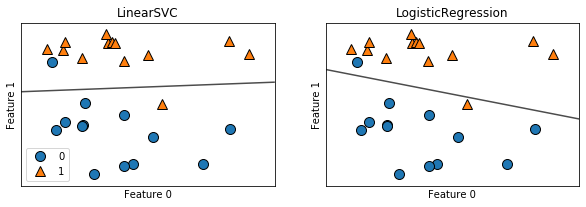

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

The two models come up with similar decision boundaries. Note that both misclassify two of the points. By default, both models apply an L2 regularization, in the same way that Ridge does for regression

For LogisticRegression and LinearSVC the trade-off parameter that determines the strength of the regularization is called [C], and higher values of C correspond to less regularization.when you use a high value for the parameter C, LogisticRegression and LinearSVC try to fit the training set as best as possible, while with low values of the parameter C, the models put more emphasis on finding a coefficient vector (w) that is close to zero.

There is another interesting aspect of how the parameter C acts. Using low values of C will cause the algorithms to try to adjust to the “majority” of data points, while using a higher value of C stresses the importance that each individual data point be classified correctl

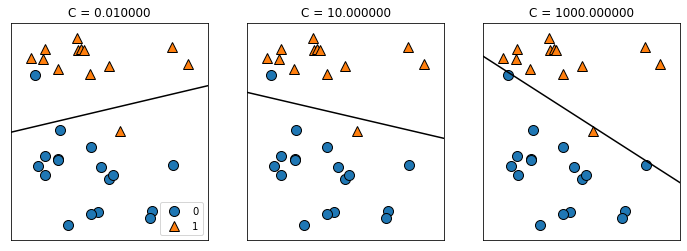

In [33]:
mglearn.plots.plot_linear_svc_regularization()

## LinearLogistic in more detail on the Breast Cancer dataset

In [34]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.965


Default value for c is 1 ,As training and test set performance are very close, it is likely that we are underfitting.

In [35]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.951


In [36]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


As expected, when moving more to the left along the scale from
an already underfit model, both training and test set accuracy decrease relative to the default parameters

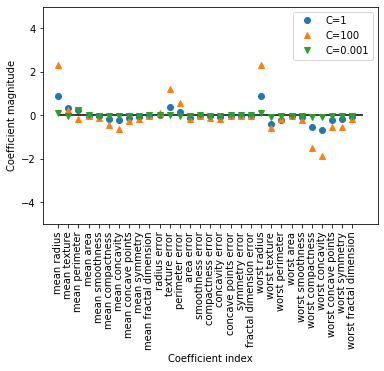

In [37]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

As LogisticRegression applies an L2 regularization by default,
the result looks similar to that produced by Ridge .
Stronger regularization pushes coefficients more and more toward
zero, though coefficients never become exactly zero. Inspecting the
plot more closely, we can also see an interesting effect in the third
coefficient, for “mean perimeter.” For C=100 and C=1, the coefficient
is negative, while for C=0.001, the coefficient is positive, with a
magnitude that is even larger than for C=1. Interpreting a model
like this, one might think the coefficient tells us which class a fea‐
ture is associated with. For example, one might think that a high
“texture error” feature is related to a sample being “malignant.”
However, the change of sign in the coefficient for “mean perimeter”
means that depending on which model we look at, a high “mean
perimeter” could be taken as being either indicative of “benign” or
indicative of “malignant.” This illustrates that interpretations of
coefficients of linear models should always be taken with a grain of
salt.

If we desire a more interpretable model, using L1 regularization might help, as it limits the model to using only a few features. Here is the coefficient plot and classification accuracies for L1 regularization

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


Text(0, 0.5, 'Coefficient magnitude')

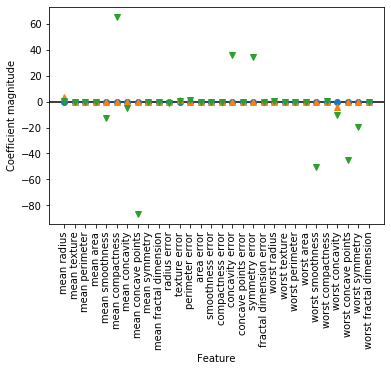

In [38]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

### Linear Model for Multi-class Classification
Many linear classification models are for binary classification only, and don’t extend naturally to the multiclass case (with the exception of logistic regression). A common technique to extend a binary classification algorithm to a multiclass classification algorithm is the [one-vs.-rest approach]. In the one-vs.-rest approach, a binary model is learned for each class that tries to separate that class from all of the other classes,resulting in as many binary models as there are classes. To make a prediction, all binary classifiers are run on a test point. The classifier that has the highest score on its
single class “wins,” and this class label is returned as the prediction.

#### Mathematically
w[0\] * x[0\] + w[1\] * x[1\] + ... + w[p\] * x[p\] + b

Having one binary classifier per class results in having one vector of coefficients (w) and one intercept (b) for each class.


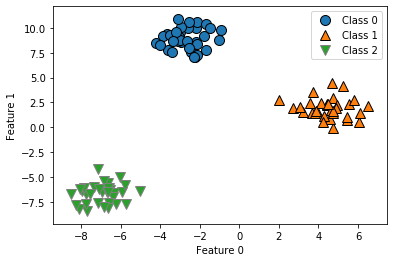

In [39]:
## Data Sampled From a Gaussian Distribution
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [40]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


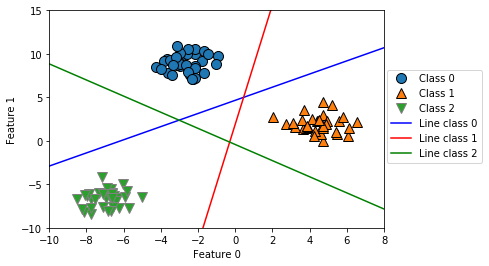

In [41]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))

But what about the triangle in the middle of the plot? All three binary classifiers classify points there as “rest.” Which class would a point there be assigned to? The answer is the one with the highest value for the classification formula: the class of the closest line.

Text(0, 0.5, 'Feature 1')

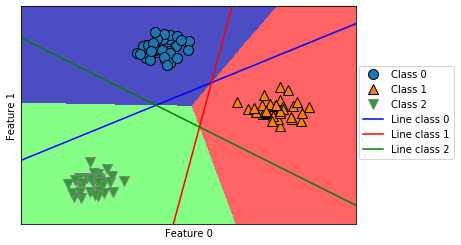

In [42]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### important
The main parameter of linear models is the regularization parameter, called alpha in the regression models and C in LinearSVC and LogisticRegression. 

Large values for alpha or small values for C mean simple models.

In particular for the regression models, tuning these parameters is quite important. Usually C and alpha are searched for on a logarithmic scale. 

The other decision you have to make is whether you want to use L1 regularization or L2 regularization. If you assume that only a few of your features are actually important, you should use L1. Otherwise, you should default to L2.

L1 can also be useful if interpretability of the model is important. As L1 will use only a few features, it is easier to explain which features are important to the model, and what the effects of these features are.

If your data consists of hundreds of thousands or millions of samples, you might want to investigate using the solver='sag' option in LogisticRegression and Ridge, which can be faster than the default on large datasets. Other options are the SGDClassifier class and the SGDRegressor class, which implement even more scalable versions of the linear models described here.

## Naive Byes Classifier
they tend to be even faster in training. The price paid for this efficiency is that naive Bayes models often provide generalization performance that is slightly worse than that of linear classifiers like
LogisticRegression and LinearSVC.

The reason that naive Bayes models are so efficient is that they learn parameters by looking at each feature individually and collect simple per-class statistics from each feature. 

scikit-learn:GaussianNB, BernoulliNB, and MultinomialNB. 
GaussianNB can be applied to any continuous data while BernoulliNB assumes binary data and MultinomialNB assumes count data .BernoulliNB and MultinomialNB are mostly used in text data classification

### BernoulliNB Classifier
counts how often every feature of each class is not zero

In [49]:
X = np.array([[0, 1, 0, 1],
[1, 0, 1, 1],
[0, 0, 0, 1],
[1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis = 0)
print("Feature counts:\n{}".format(counts))

0
[[0 1 0 1]
 [0 0 0 1]]
1
[[1 0 1 1]
 [1 0 1 0]]
Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


MultinomialNB and GaussianNB, are slightly different in what kinds of statistics they compute. 

MultinomialNB takes into account the average value of each feature for each class

while GaussianNB stores the average value as well as the standard deviation of each feature for each class.

#### Prediction
To make a prediction, a data point is compared to the statistics for each of the classes, and the best matching class is predicted. 

Interestingly, for both MultinomialNB and
BernoulliNB, this leads to a prediction formula that is of the same form as in the linear models

Unfortunately, coef_ for the naive Bayes models has a somewhat different meaning than in the linear models, in that coef_ is not the same as w.

#### Important:
Generally:The naive Bayes models share many of the strengths and weaknesses of the linear
models. They are very fast to train and to predict, and the training procedure is easy
to understand. The models work very well with high-dimensional sparse data and are
relatively robust to the parameters. Naive Bayes models are great baseline models and
are often used on very large datasets, where training even a linear model might take
too long

MultinomialNB and BernoulliNB have a single parameter, alpha, which controls model complexity. The way alpha works is that the algorithm adds to the data alpha many virtual data points that have positive values for all the features. This results in a “[smoothing]” of the statistics. A large alpha means more smoothing, resulting in less
complex models. The algorithm’s performance is relatively robust to the setting of alpha, meaning that setting alpha is not critical for good performance. However,tuning it usually improves accuracy somewhat.

GaussianNB is mostly used on very high-dimensional data, while the other two variants of naive Bayes are widely used for sparse count data such as text. 

MultinomialNB usually performs better than BinaryNB, particularly on datasets with a relatively large number of nonzero features (i.e., large documents)

## Decision Trees
Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision


ModuleNotFoundError: No module named 'graphviz'